<a href="https://colab.research.google.com/github/osss2046/tareas/blob/main/tarea_9_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarea 9.7

Suponga que la medición de un cierto proceso físico da como resultado la siguiente expresión

$$p(x)=sinx+n(x)$$

donde n es el error experimental que podemos describir como un número aleatorio, para cada valor de x, tomado de una distribución gaussiana con media 0 y desviación estándar 10−5. Queremos calcular la integral

$$∫_0^1 dx \, p(x)$$.

Use la cuadratura adaptativa para calcular esta integral. El verdadero valor de esta integral es 1−cos(1). Grafique el error cometido en función de la tolerancia. ¿Se puede lograr una precisión de $10^{−7}$? ¿Qué podemos decir sobre la estabilidad de la cuadratura adaptativa?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
#usamos la cuadratura adaptativa
class MaxIterations(Exception):
    pass

def adaptive(f, a, b, tol, N=100000):
    
    # Variables iniciales
    approx = 0
    i = 0
    toli = [10*tol]
    ai = [a]
    hi = [(b - a)/2]
    fai = [f(a)]
    fbi = [f(b)]
    fci = [f(a + hi[i])]
    S0i = [hi[i]*(fai[i] + 4*fci[i] + fbi[i])/3]
    Li = [1]
    
        
    
    while i >= 0:
        
        fd = f(ai[i] + hi[i]/2)
        fe = f(ai[i] + 3*hi[i]/2)
        S1 = hi[i]*(fai[i] + 4*fd + fci[i])/6
        S2 = hi[i]*(fci[i] + 4*fe + fbi[i])/6
        ai_prec = ai[i]
        hi_prec = hi[i]
        fai_prec = fai[i]
        fbi_prec = fbi[i]
        fci_prec = fci[i]
        toli_prec = toli[i]
        S0i_prec = S0i[i]
        Li_prec = Li[i]
        
        i -= 1
        if abs(S1 + S2 - S0i_prec) < toli_prec:
            approx += S1 + S2
        else:
            if Li_prec >= N:
                raise MaxIterations("Alcanzado máximo número de iteraciones.")
            
            # Intervalo derecho
            i += 1
            if i >= len(ai): # A veces hay que ampliar la lista
                ai.append(ai_prec + hi_prec)
                fai.append(fci_prec)
                fci.append(fe)
                fbi.append(fbi_prec)
                hi.append(hi_prec/2)
                toli.append(toli_prec/2)
                S0i.append(S2)
                Li.append(Li_prec + 1)
            else:
                ai[i] = ai_prec + hi_prec
                fai[i] = fci_prec
                fci[i] = fe
                fbi[i] = fbi_prec
                hi[i] = hi_prec/2
                toli[i] = toli_prec/2
                S0i[i] = S2
                Li[i] = Li_prec + 1
                
            # Intervalo izquierdo
            i += 1
            if i >= len(ai):
                ai.append(ai_prec)
                fai.append(fai_prec)
                fci.append(fd)
                fbi.append(fci_prec)
                hi.append(hi[i-1])
                toli.append(toli[i-1])
                S0i.append(S1)
                Li.append(Li[i-1])
            else:
                ai[i] = ai_prec
                fai[i] = fai_prec
                fci[i] = fd
                fbi[i] = fci_prec
                hi[i] = hi[i-1]
                toli[i] = toli[i-1]
                S0i[i] = S1
                Li[i] = Li[i-1]
                
    return approx

#creamos el error gaussiano
error=random.gauss(0, 10**-5)
#calculamos la integral
adaptive(lambda x: np.sin(x)+error, 0, 1, 0.00000001)




0.4597065528050106

de la expresión vista en clases podemos obtener el error
$$
\int_a^b dx\,f(x) = \frac{h}{6}(f(a) + 4f(a + h/2) + 2f(a + h) + 4f(a + 3h/2) + f(b)) - \frac{1}{16}\frac{h^5}{90}f^{(4)}(\bar{\xi}) \equiv S_1  - \frac{1}{16}\frac{h^5}{90}f^{(4)}(\xi)
$$
el ultimo termino corresponde al error y lo despejamos
$$
Error =\sum_{j=1}^{n/2} \frac{1}{16}\frac{h^5}{90}p^{(4)}(\xi_{j})
$$
y consideramos $n=\frac{b-a}{h}=\frac{1}{h}$.


Text(0, 0.5, 'error')

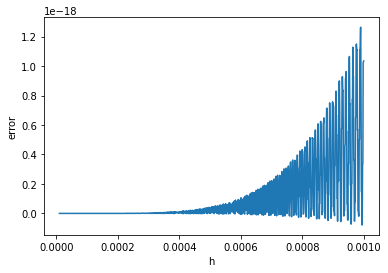

In [25]:
#hacemos una función para definir el error en función de h
def error(h):
    #variable para contar
    v1=0
    #usamos la expresión para el error
    valor=int(1/(2*h))
    for i in range(1,valor+1):
        v1=v1+(1/(16*90))*(h**(5))*np.sin(i)
    return v1 

#graficamos 
h1 = np.linspace(0.00001,0.001,1000)
plt.plot(h1, [error(xi) for xi in h1] )
plt.xlabel('h')
plt.ylabel('error')

Vemos que para $h$ grandes el error va aumentando pero se puede lograr una precisión de $10^{-7}$ con un h pequeño. A partir de la oscilaciones del error vemos que este crece de manera muy rapida.